Note : Make A Virtual Environment If you want to Use it in Local 
Else Upload This in Google Collab and Run it 

In [41]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [42]:
def preprocess_mnist_data(images, labels):
    # Normalize pixel values to be between 0 and 1
    images = images.astype('float32') / 255.0
    return images, labels

In [43]:
def visualize_random_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        index = np.random.randint(len(images))
        ax = axes[i]
        ax.imshow(images[index], cmap='gray')
        ax.set_title(f"Label: {labels[index]}")
        ax.axis('off')

    plt.show()

In [44]:
def cpu_cnn(images_train, labels_train, images_test):
    
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    #This Model Will Perform Computation in CPU
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    model.fit(images_train, labels_train, epochs=3, batch_size=32, validation_split=0.2, verbose=0)
    predictions = model.predict(images_test)
    pred = np.argmax(predictions, axis=1)
    cpu_elapsed_time = time.time() - start_time
    return pred,cpu_elapsed_time

In [45]:
def gpu_cnn(images_train, labels_train, images_test):
    # TensorFlow constants created from NumPy arrays
    #These constants are then used as inputs to the GPU-accelerated model
    cp_images_train = tf.constant(images_train)
    cp_labels_train = tf.constant(labels_train)
    cp_images_test = tf.constant(images_test)
    

    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    #This Model Will Perform Computation in GPU
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    model.fit(cp_images_train, cp_labels_train, epochs=3, batch_size=32, validation_split=0.2, verbose=0)
    predictions = model.predict(cp_images_test)
    gpu_elapsed_time = time.time() - start_time
    return np.argmax(tf.make_ndarray(tf.make_tensor_proto(predictions)), axis=1),gpu_elapsed_time


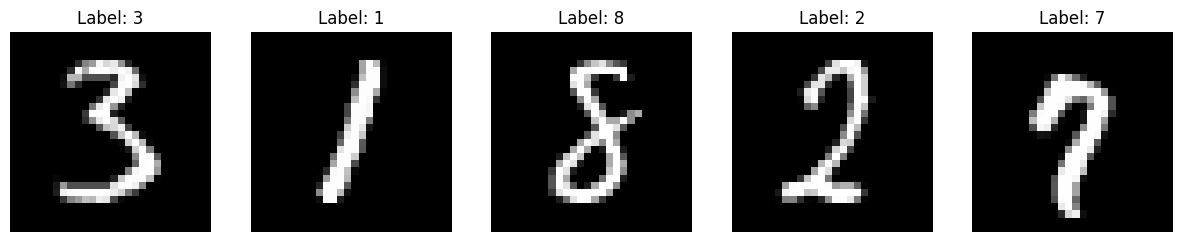

CPU Accuracy: 0.9785
GPU Accuracy: 0.9814166666666667

Timings:
CPU Time: 19.201062202453613 seconds
GPU Time: 19.016143083572388 seconds


In [50]:

def main():
    # Load MNIST dataset
    (images, labels), (_, _) = mnist.load_data()
    visualize_random_images(images, labels)

    # Preprocess data
    images, labels = preprocess_mnist_data(images, labels)
    images = np.expand_dims(images, axis=-1)

    # Split data into training and testing sets
    images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    cpu_predictions, cpu_elapsed_time = cpu_cnn(images_train, labels_train, images_test)
    gpu_predictions,gpu_elapsed_time = gpu_cnn(images_train, labels_train, images_test)

    # Evaluate accuracy
    cpu_accuracy = accuracy_score(labels_test, cpu_predictions)
    gpu_accuracy = accuracy_score(labels_test, gpu_predictions)

    print("CPU Accuracy:", cpu_accuracy)
    print("GPU Accuracy:", gpu_accuracy)

    print("\nTimings:")
    print("CPU Time:", cpu_elapsed_time, "seconds")
    print("GPU Time:", gpu_elapsed_time, "seconds")

if __name__ == "__main__":
    main()


The Time Difference between CPU and GPU execution could be vary sometime CPU will give short time and some time GPU will give , Because 
GPU time depende Upon different criteria like , complexity level , king of operation that you are performing and what kind of architecture that you are using .

This Example That we have used is to demonstrate the work of any task Execute in CPU and GPU .
